In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import time
import matplotlib.pyplot as plt

In [13]:
# Printing out all the compute devices visible to TensorFlow.

print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [14]:
# Import the MNIST dataset of 60,000 28x28 pixel handwritten digit images along with corresponding digit label (0-9) for each image.
# This dataset is divided into a training set of 50,000 images and a test set of 10,000 images.

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

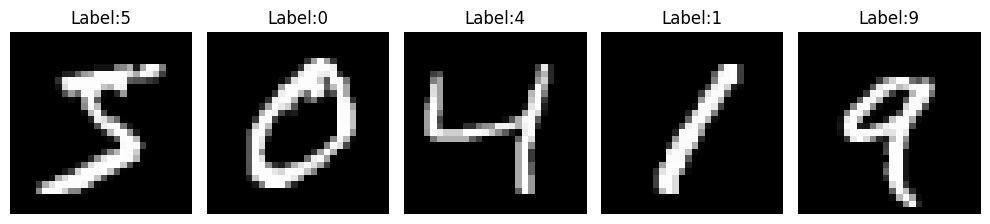

In [15]:
# Displaying the actual sample images from the MNIST dataset.

num_samples_to_display = 5
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label:{train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Defining a complex model with deeper layers and dropout.

def create_complex_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [17]:
# Defining and training models on both CPU and GPU alternatively.

def train_model_on_device(model, train_images, train_labels, test_images, test_labels, device):
    optimizer = tf.keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Using {device} for computations.")
    start_time = time.time()
    with tf.device(device):
        history = model.fit(train_images, train_labels,
                            epochs=10, batch_size=128,
                            validation_data=(test_images, test_labels))
    end_time = time.time()

    return history, end_time - start_time

In [18]:
# GPU Training

with tf.device('/GPU:0'):
    gpu_model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    gpu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    print("Using GPU for computations.")
    start_time_gpu = time.time()
    gpu_history = gpu_model.fit(train_images, train_labels,
                                epochs=10, batch_size=128,
                                validation_data=(test_images, test_labels))
    end_time_gpu = time.time()

    gpu_time = end_time_gpu - start_time_gpu

Using GPU for computations.
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.3536 - accuracy: 0.9026 - val_loss: 0.2028 - val_accuracy: 0.9386
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1631 - accuracy: 0.9531 - val_loss: 0.1329 - val_accuracy: 0.9609
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1166 - accuracy: 0.9663 - val_loss: 0.1122 - val_accuracy: 0.9659
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9738 - val_loss: 0.0968 - val_accuracy: 0.9717
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0726 - accuracy: 0.9789 - val_loss: 0.0878 - val_accuracy: 0.9728
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9818 - val_loss: 0.0796 - val_accuracy: 0.9747
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.0775 -

In [19]:
# CPU Training

with tf.device('/CPU:0'):
    cpu_model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    cpu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    start_time_cpu = time.time()
    cpu_history = cpu_model.fit(train_images, train_labels,
                                epochs=10, batch_size=128,
                                validation_data=(test_images, test_labels))
    end_time_cpu = time.time()

    cpu_time = end_time_cpu - start_time_cpu

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3503 - accuracy: 0.9028 - val_loss: 0.1910 - val_accuracy: 0.9443
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1661 - accuracy: 0.9526 - val_loss: 0.1426 - val_accuracy: 0.9590
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1196 - accuracy: 0.9660 - val_loss: 0.1141 - val_accuracy: 0.9662
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0924 - accuracy: 0.9731 - val_loss: 0.0966 - val_accuracy: 0.9703
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0746 - accuracy: 0.9786 - val_loss: 0.0871 - val_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.9826 - val_loss: 0.0825 - val_accuracy: 0.9737
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0804 - val_accuracy: 0.9758
Epoch 

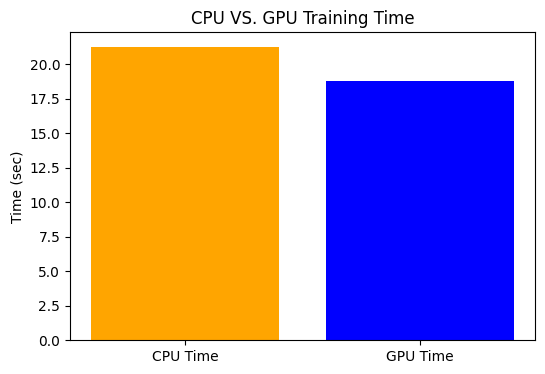

In [21]:
# Plotting the training time comparison for CPU and GPU.

x = ['CPU Time', 'GPU Time']
y = [cpu_time, gpu_time]

plt.figure(figsize=(6, 4))
plt.bar(x, y, color=['orange', 'blue'])
plt.ylabel("Time (sec)")
plt.title("CPU VS. GPU Training Time")
plt.show()

In [22]:
# Visualizing the training history trend for accuracy and loss in case of both GPU and CPU Model.

def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')

    plt.tight_layout()
    plt.show()

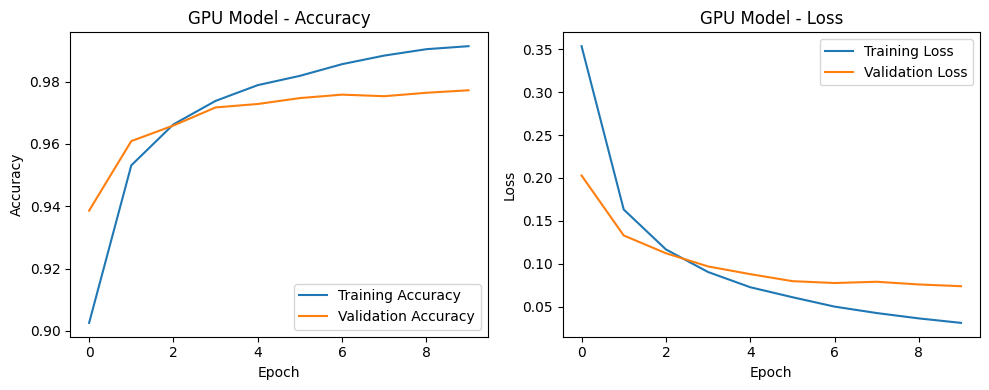

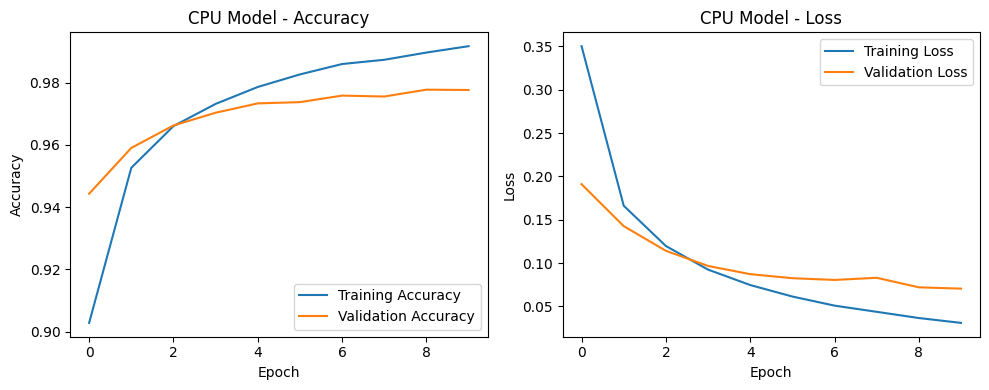

In [23]:
plot_training_history(gpu_history, 'GPU Model')
plot_training_history(cpu_history, 'CPU Model')